<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/2.%20Convolutional%20Neural%20Networks%20in%20TensorFlow/week_4/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

  # 요약: 첫번째 줄 무시해라, 각 줄의 첫번쨰 값은 label, 나머지는 그림
  # 그림 형식 28*28로 변환, 값 형식 float로 변환 > np.array().astype 사용  
    with open(filename) as training_file:
      # Your code starts here
      image = []
      label = []
      flag = 0

      # 나는 그냥 파일 줄 별로 가져와서 사용했는데
      #csv_reader = csv.reader(training_file, delimeter=',')
      #for row in csv_reader: 이렇게 하면 따로 split 할 필요 없음 
      # 위에서 csv 모듈 가져왔으니 사용하는 쪽으로 생각하기 

      for row in training_file: 
          if flag == 0:
              flag=1
              continue
          rows = row.split(',')
          #for i in range(len(rows)):
          #    rows[i] = float(rows[i])
          #astype 함수로 for문 사용 없이 처리 가능 
          label.append(rows[0])
          image.append(np.array_split(rows[1:], 28))
            
      images = np.array(image).astype(float)
      labels = np.array(label).astype(float)

      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# shape 상에서 차원이 추가되는 인덱스가 axis, 축 
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1/255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')   # 26인건 어디에 나오지? > kaggle dataset 페이지에
])

# Compile Model. 
model.compile(
    # Your Code Here
    optimizer=tf.optimizers.Adam(),   # RMSprop import 하고 있지 않음
    loss='sparse_categorical_crossentropy', 
    metrics=['acc']
)

# Train the Model
history = model.fit(
    # Your Code Here
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch=len(training_images)//32,
    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps=len(testing_images)//32,
    epochs=15
)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
857/857 [==============================] - 10s 11ms/step - loss: 2.8607 - acc: 0.1386 - val_loss: 1.5529 - val_acc: 0.4890
Epoch 2/15
857/857 [==============================] - 10s 11ms/step - loss: 1.7715 - acc: 0.4333 - val_loss: 0.9692 - val_acc: 0.6497
Epoch 3/15
857/857 [==============================] - 10s 11ms/step - loss: 1.2838 - acc: 0.5766 - val_loss: 0.7474 - val_acc: 0.7441
Epoch 4/15
857/857 [==============================] - 9s 11ms/step - loss: 1.0250 - acc: 0.6588 - val_loss: 0.5059 - val_acc: 0.8090
Epoch 5/15
857/857 [==============================] - 10s 11ms/step - loss: 0.8581 - acc: 0.7149 - val_loss: 0.3682 - val_acc: 0.8838
Epoch 6/15
857/857 [==============================] - 10s 11ms/step - loss: 0.7356 - acc: 0.7572 - val_loss: 0.3361 - val_acc: 0.8672
Epoch 7/15
857/857 [==============================] - 10s 11ms/step - loss: 0.6307 - acc: 0.7895 - val_loss: 0.2702 - val_acc: 0.8984
Epoch 8/15
857/857 [==============================] - 9s 11ms/s

[6.92426086682151, 0.56609035]

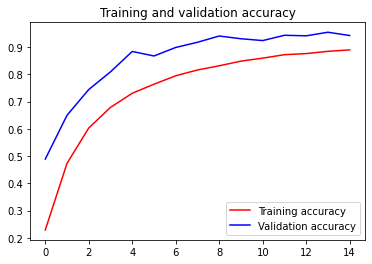

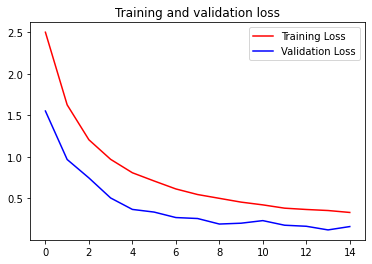

In [9]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc =  history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()